## Final Project Submission

Please fill out:
* Student name: Juico Bowley
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Rafael Carassco


In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd

import scipy.stats as scs 
import statsmodels.api as sm


from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold

import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsFunctions as sf

In [2]:
# read in housing data with waterfront distance and shortest distance to the hospital data
water_and_path = pd.read_csv("../data/cleaned_with_water_and_path.csv")
water_and_path.head()

,field_1,id,date,price,bedrooms,bathrooms,sqft_livin,sqft_lot,floors,waterfront,...,yr_renovat,zipcode,lat,long,sqft_liv_1,sqft_lot15,bed_to_bat,has_baseme,water_dist,path_cost
0,0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,0,...,0,98178,47.5112,-122.257,1340,5650,3.000000,0,0.372917,0.336465
1,1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0,...,1991,98125,47.7210,-122.319,1690,7639,1.333333,1,1.896205,0.167000
2,3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0,...,0,98136,47.5208,-122.393,1360,5000,1.333333,1,0.070517,0.381805
3,4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0,...,0,98074,47.6168,-122.045,1800,7503,1.500000,0,1.092012,0.132243
4,6,1321400060,6/27/2014,257500,3,2.25,1715,6819,2.0,0,...,0,98003,47.3097,-122.327,2238,6819,1.333333,0,2.238557,0.498347


In [3]:
# read in data with brewery distance feature
with open('../data/brew_distances.pkl', 'rb') as f:
    brew_distances = pickle.load(f)

Checking the size and order of both dataframes to see if I can just grab the column I need and add it to the other df

In [4]:
# need to join dfs since one has the data from qgis and the other has the brewery information
brew_distances.shape, water_and_path.shape

((15386, 32), (15386, 26))

In [5]:
brew_distances.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,has_basement,coords,Cloudburst Brewing,Fremont Brewing Co,Holy Mountain Brewing Co,Optimism Brewing Company,Reuben's Brews Taproom,Urban Family Brewing,closest,closest_dist
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,"(47.5112, -122.257)",8.07,10.37,9.93,7.61,11.96,12.06,Optimism Brewing Company,7.61
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1.0,"(47.721, -122.319)",7.66,5.10,6.75,7.48,4.60,5.34,Reuben's Brews Taproom,4.60
2,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1.0,"(47.5208, -122.393)",6.66,9.16,7.65,7.20,10.03,9.66,Cloudburst Brewing,6.66
3,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,"(47.6168, -122.045)",14.03,14.16,15.42,12.86,15.69,16.40,Optimism Brewing Company,12.86
4,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,0.0,"(47.3097, -122.327)",20.87,23.47,22.30,20.94,24.67,24.42,Cloudburst Brewing,20.87


In [6]:
water_and_path.head()

,field_1,id,date,price,bedrooms,bathrooms,sqft_livin,sqft_lot,floors,waterfront,...,yr_renovat,zipcode,lat,long,sqft_liv_1,sqft_lot15,bed_to_bat,has_baseme,water_dist,path_cost
0,0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,0,...,0,98178,47.5112,-122.257,1340,5650,3.000000,0,0.372917,0.336465
1,1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0,...,1991,98125,47.7210,-122.319,1690,7639,1.333333,1,1.896205,0.167000
2,3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0,...,0,98136,47.5208,-122.393,1360,5000,1.333333,1,0.070517,0.381805
3,4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0,...,0,98074,47.6168,-122.045,1800,7503,1.500000,0,1.092012,0.132243
4,6,1321400060,6/27/2014,257500,3,2.25,1715,6819,2.0,0,...,0,98003,47.3097,-122.327,2238,6819,1.333333,0,2.238557,0.498347


In [7]:
brew_distances.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,has_basement,coords,Cloudburst Brewing,Fremont Brewing Co,Holy Mountain Brewing Co,Optimism Brewing Company,Reuben's Brews Taproom,Urban Family Brewing,closest,closest_dist
15381,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,0.0,"(47.6993, -122.346)",6.06,3.46,4.91,6.10,2.66,3.38,Reuben's Brews Taproom,2.66
15382,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,0.0,"(47.5107, -122.362)",7.02,9.60,8.32,7.31,10.70,10.44,Cloudburst Brewing,7.02
15383,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,0.0,"(47.5944, -122.299)",2.47,4.34,4.34,1.61,6.01,6.25,Optimism Brewing Company,1.61
15384,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,0.0,"(47.5345, -122.069)",13.97,15.12,15.76,12.93,16.85,17.36,Optimism Brewing Company,12.93
15385,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,0.0,"(47.5941, -122.299)",2.48,4.36,4.35,1.63,6.02,6.27,Optimism Brewing Company,1.63


In [8]:
water_and_path.tail()

,field_1,id,date,price,bedrooms,bathrooms,sqft_livin,sqft_lot,floors,waterfront,...,yr_renovat,zipcode,lat,long,sqft_liv_1,sqft_lot15,bed_to_bat,has_baseme,water_dist,path_cost
15381,21592,263000018,5/21/2014,360000,3,2.50,1530,1131,3.0,0,...,0,98103,47.6993,-122.346,1530,1509,1.200000,0,1.060266,0.140452
15382,21593,6600060120,2/23/2015,400000,4,2.50,2310,5813,2.0,0,...,0,98146,47.5107,-122.362,1830,7200,1.600000,0,1.231495,0.379777
15383,21594,1523300141,6/23/2014,402101,2,0.75,1020,1350,2.0,0,...,0,98144,47.5944,-122.299,1020,2007,2.666667,0,0.550658,0.133702
15384,21595,291310100,1/16/2015,400000,3,2.50,1600,2388,2.0,0,...,0,98027,47.5345,-122.069,1410,1287,1.200000,0,1.452421,0.415301
15385,21596,1523300157,10/15/2014,325000,2,0.75,1020,1076,2.0,0,...,0,98144,47.5941,-122.299,1020,1357,2.666667,0,0.547979,0.134369


Because both dataframes are the same length and appear to be in the same order, I'll just grab the 'water_dist' column of the 'water_and_path' df and toss it on the 'brew_distances' df. I'm choosing to not use the 'path_cost' feature as that data is only reliable for the Seattle proper region and does not provide accurate driving time information for houses located east of Lake Washington since I had not incorporated network data for those regions.

In [9]:
brew_distances['water_dist'] = water_and_path['water_dist']

In [10]:
brew_distances.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,coords,Cloudburst Brewing,Fremont Brewing Co,Holy Mountain Brewing Co,Optimism Brewing Company,Reuben's Brews Taproom,Urban Family Brewing,closest,closest_dist,water_dist
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,"(47.5112, -122.257)",8.07,10.37,9.93,7.61,11.96,12.06,Optimism Brewing Company,7.61,0.372917
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,"(47.721, -122.319)",7.66,5.10,6.75,7.48,4.60,5.34,Reuben's Brews Taproom,4.60,1.896205
2,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,"(47.5208, -122.393)",6.66,9.16,7.65,7.20,10.03,9.66,Cloudburst Brewing,6.66,0.070517
3,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,"(47.6168, -122.045)",14.03,14.16,15.42,12.86,15.69,16.40,Optimism Brewing Company,12.86,1.092012
4,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,"(47.3097, -122.327)",20.87,23.47,22.30,20.94,24.67,24.42,Cloudburst Brewing,20.87,2.238557


In [11]:
df = brew_distances

In [12]:
df.isna().sum()

id                          0
date                        0
price                       0
bedrooms                    0
bathrooms                   0
sqft_living                 0
sqft_lot                    0
floors                      0
waterfront                  0
view                        0
condition                   0
grade                       0
sqft_above                  0
sqft_basement               0
yr_built                    0
yr_renovated                0
zipcode                     0
lat                         0
long                        0
sqft_living15               0
sqft_lot15                  0
bed_to_bath                 0
has_basement                0
coords                      0
Cloudburst Brewing          0
Fremont Brewing Co          0
Holy Mountain Brewing Co    0
Optimism Brewing Company    0
Reuben's Brews Taproom      0
Urban Family Brewing        0
closest                     0
closest_dist                0
water_dist                  0
dtype: int

In [13]:
# need to deal with a few more outliers that were left for visualizing EDA questions
df = df[df.price <= 1500000]
df = df[(df.bedrooms >= 1) & (df.bedrooms <=6)]

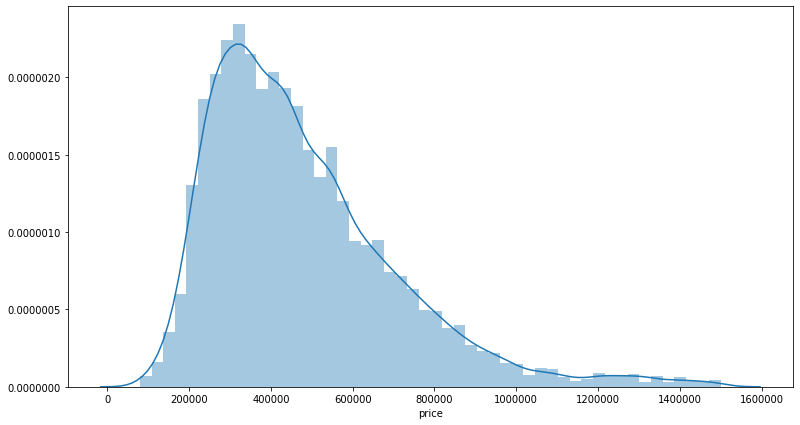

In [14]:
plt.figure(figsize=(13,7))
sns.distplot(df.price);

In [15]:
# identifying features based on correlation
target = 'price'
columns_correlations = []
columns_non_numeric = []

for column in df.drop(columns=[target]).columns:
    try:
        corr = np.abs(df[column].corr(df[target]))
        t = (column, corr)
        columns_correlations.append(t)
    except:
        columns_non_numeric.append(column)

In [16]:
columns_correlations = sorted(columns_correlations, key = lambda x: x[1], reverse=True)
columns_correlations

[('grade', 0.6149191909750555),
 ('sqft_living', 0.6028131865926732),
 ('sqft_living15', 0.4958230369772364),
 ('sqft_above', 0.47989068482524433),
 ('lat', 0.4364704265841975),
 ('Fremont Brewing Co', 0.4291818223967511),
 ('bathrooms', 0.4239519182864714),
 ("Reuben's Brews Taproom", 0.41264658287383665),
 ('Optimism Brewing Company', 0.4043999969150118),
 ('Urban Family Brewing', 0.4020860270641661),
 ('closest_dist', 0.39910926661543156),
 ('Holy Mountain Brewing Co', 0.39413441020338624),
 ('Cloudburst Brewing', 0.3839611338242601),
 ('water_dist', 0.3037618283877229),
 ('view', 0.30077043624995076),
 ('bedrooms', 0.29000802177765356),
 ('sqft_basement', 0.28901170537851123),
 ('floors', 0.2707903663704371),
 ('has_basement', 0.21976190117308317),
 ('bed_to_bath', 0.21197739766536847),
 ('yr_renovated', 0.11502877625815425),
 ('sqft_lot15', 0.08674233171969002),
 ('sqft_lot', 0.07870689209733066),
 ('waterfront', 0.06556789429301778),
 ('zipcode', 0.06311663855506612),
 ('conditio

In [17]:
correlated_features_above_15 = [t[0] for t in columns_correlations if t[1] >= 0.15]
correlated_features_above_15

['grade',
 'sqft_living',
 'sqft_living15',
 'sqft_above',
 'lat',
 'Fremont Brewing Co',
 'bathrooms',
 "Reuben's Brews Taproom",
 'Optimism Brewing Company',
 'Urban Family Brewing',
 'closest_dist',
 'Holy Mountain Brewing Co',
 'Cloudburst Brewing',
 'water_dist',
 'view',
 'bedrooms',
 'sqft_basement',
 'floors',
 'has_basement',
 'bed_to_bath']

In [18]:
whole_space = correlated_features_above_15
whole_space.append(target)

In [19]:
correlated_df = df[whole_space]

In [20]:
correlated_df.head()

,grade,sqft_living,sqft_living15,sqft_above,lat,Fremont Brewing Co,bathrooms,Reuben's Brews Taproom,Optimism Brewing Company,Urban Family Brewing,...,Holy Mountain Brewing Co,Cloudburst Brewing,water_dist,view,bedrooms,sqft_basement,floors,has_basement,bed_to_bath,price
0,7,1180,1340,1180,47.5112,10.37,1.00,11.96,7.61,12.06,...,9.93,8.07,0.372917,0.0,3,0.0,1.0,0.0,3.000000,221900.0
1,7,2570,1690,2170,47.7210,5.10,2.25,4.60,7.48,5.34,...,6.75,7.66,1.896205,0.0,3,400.0,2.0,1.0,1.333333,538000.0
2,7,1960,1360,1050,47.5208,9.16,3.00,10.03,7.20,9.66,...,7.65,6.66,0.070517,0.0,4,910.0,1.0,1.0,1.333333,604000.0
3,8,1680,1800,1680,47.6168,14.16,2.00,15.69,12.86,16.40,...,15.42,14.03,1.092012,0.0,3,0.0,1.0,0.0,1.500000,510000.0
4,7,1715,2238,1715,47.3097,23.47,2.25,24.67,20.94,24.42,...,22.30,20.87,2.238557,0.0,3,0.0,2.0,0.0,1.333333,257500.0


In [21]:
# pd.plotting.scatter_matrix(correlated_df, figsize=(20, 20));

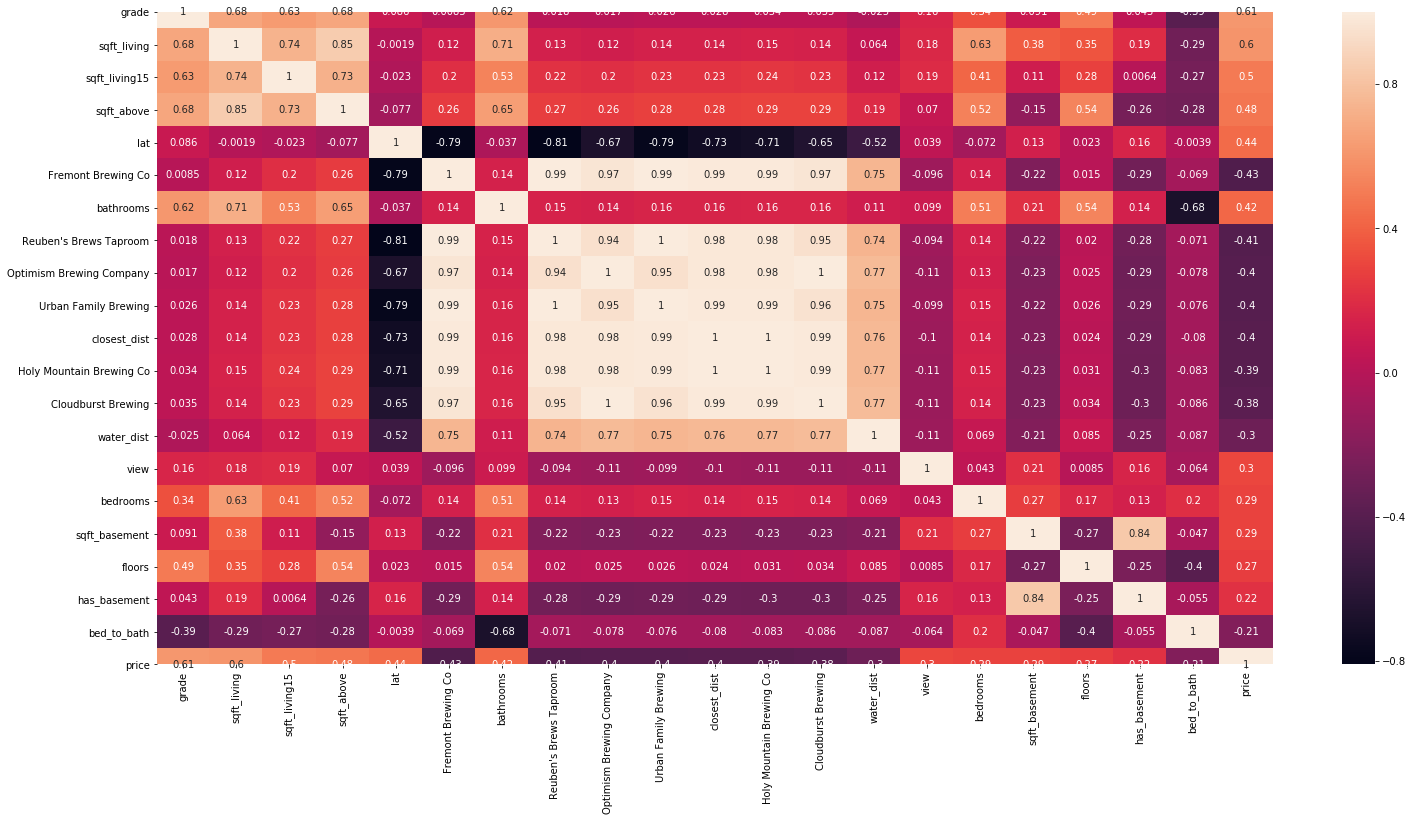

In [22]:
plt.figure(figsize=(25,12))
sns.heatmap(correlated_df.corr(), annot=True);

In [23]:
ols = sf.check_model(correlated_df, features_to_use=correlated_features_above_15, target_col=target)
ols

grade surpassed threshold with vif=170.32142196489607
sqft_living surpassed threshold with vif=956.0787182347161
sqft_living15 surpassed threshold with vif=32.263988217234754
sqft_above surpassed threshold with vif=727.5448793402683
lat surpassed threshold with vif=214.9780487181821
Fremont Brewing Co surpassed threshold with vif=10237.931082137291
bathrooms surpassed threshold with vif=100.26064831139519
Reuben's Brews Taproom surpassed threshold with vif=32484.786217401444
Optimism Brewing Company surpassed threshold with vif=9281.768912948886
Urban Family Brewing surpassed threshold with vif=31900.39571886881
closest_dist surpassed threshold with vif=1625.1691351117688
Holy Mountain Brewing Co surpassed threshold with vif=23332.232576086073
Cloudburst Brewing surpassed threshold with vif=21867.291883170594
water_dist surpassed threshold with vif=4.438384259765624
bedrooms surpassed threshold with vif=89.33899919121876
sqft_basement surpassed threshold with vif=52.6635086378015
floor

In [24]:

# drop sqft_living, grade, sqft_above, sqft_living15, lat
correlated_features_high_vif = ['sqft_living15', 'lat', 'sqft_above', target, 'bathrooms', 'view', 'floors', 'Holy Mountain Brewing Co', 'Cloudburst Brewing', 'Optimism Brewing Company', 'Cloudburst Brewing', 'has_basement', "Reuben's Brews Taproom", 'Urban Family Brewing', 'grade', 'sqft_basement', 'bedrooms', 'water_dist', 'Fremont Brewing Co']
correlated_features_low_vif = []

for i in correlated_features_above_15:
    if i not in correlated_features_high_vif:
        correlated_features_low_vif.append(i)
correlated_features_low_vif


['sqft_living', 'closest_dist', 'bed_to_bath']

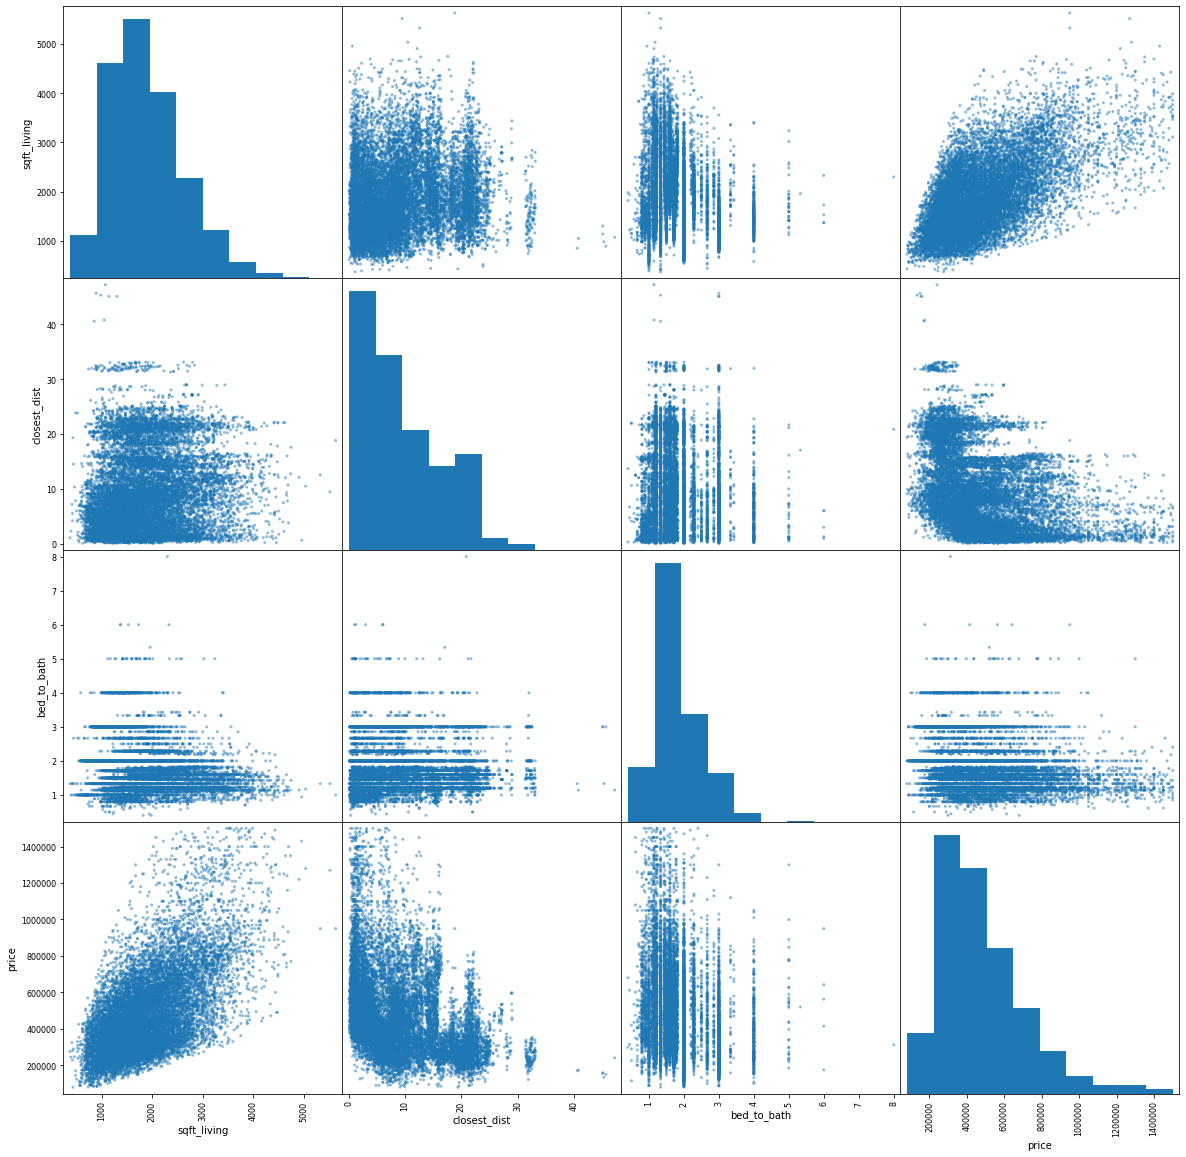

In [25]:
pd.plotting.scatter_matrix(correlated_df[correlated_features_low_vif+['price']],figsize=(20,20));
# pd.plotting.scatter_matrix(correlated_df, figsize=(20, 20));

In [26]:
# transformed_feats = pd.DataFrame()

In [27]:
# for feat in correlated_features_low_vif:
    # transformed_feats[feat] = np.log(correlated_df[feat])

In [28]:
# transformed_feats['price'] = correlated_df['price']

In [29]:
# transformed_feats.columns

In [30]:
ols = sf.check_model(correlated_df, features_to_use=correlated_features_low_vif, target_col=target, show_summary=True)
ols

sqft_living surpassed threshold with vif=4.136551269896481
bed_to_bath surpassed threshold with vif=3.5334878271364913
Model contains multicollinear features
                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.913
Model:                            OLS   Adj. R-squared (uncentered):              0.913
Method:                 Least Squares   F-statistic:                          5.317e+04
Date:                Sun, 18 Oct 2020   Prob (F-statistic):                        0.00
Time:                        19:20:50   Log-Likelihood:                     -2.0314e+05
No. Observations:               15183   AIC:                                  4.063e+05
Df Residuals:                   15180   BIC:                                  4.063e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust             

In [31]:
sf.check_residuals_normal(ols)

False

In [32]:
sf.check_residuals_homoskedasticity(ols)

False

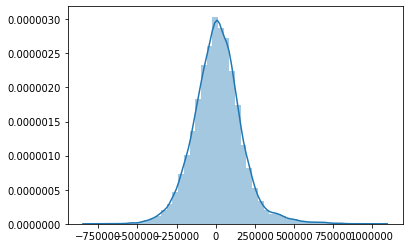

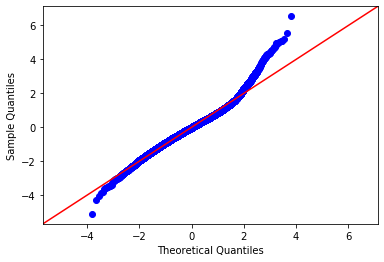

In [33]:
sns.distplot(ols.resid)
fig = sm.graphics.qqplot(ols.resid, dist=scs.norm, line='45', fit=True)


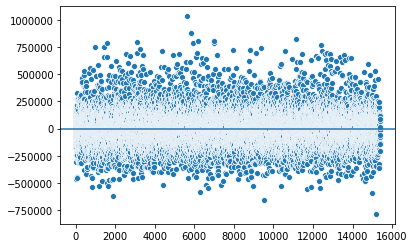

In [34]:
sns.scatterplot(data=ols.resid)
plt.axhline(0);

In [35]:
linear = LinearRegression(fit_intercept=False)

In [36]:
# ols.rsquared

In [37]:
X = correlated_df[correlated_features_low_vif]
y = correlated_df[target]

In [38]:
cross_val_score(linear, X, y, n_jobs=-1, cv=5, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s finished


array([0.49928577, 0.52439452, 0.54409726, 0.56458752, 0.54879041])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [40]:
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [41]:
linear.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [42]:
linear.score(X,y)

0.5392530930890012

In [43]:
linear.score(X_train, y_train), linear.score(X_test, y_test)

(0.5363971861976169, 0.5558463515924608)